<a href="https://colab.research.google.com/github/F-Palmieri/PRML_UPC/blob/main/scikit_learn_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Reference:

     

1.   Python machine learning : machine learning and deep learning with Python, scikit-learn, and TensorFlow. Raschka, Sebastian, autor; Mirjalili, Vahid, 2019 - Chapter 3

---


# First steps with scikit-learn

we will take a look at the **scikit-learn** API, which, as mentioned, combines a user-friendly and consistent interface with a highly optimized implementation of several classification algorithms. The scikit-learn library offers not only a large variety of learning algorithms, but also many convenient functions to preprocess data and to fine-tune and evaluate our models.



Loading the Iris dataset from scikit-learn. Here, the third column represents the petal length, and the fourth column the petal width of the flower examples. The classes are already converted to integer labels where 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica.

In [2]:
from IPython.display import Image
%matplotlib inline

from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))



Class labels: [0 1 2]


The *np.unique(y)* function returned the three unique class labels stored in
*iris.target*, and as we can see, the Iris flower class names, Iris-setosa,
Iris-versicolor, and Iris-virginica, are already stored as integers (here: 0, 1,
2). 
To evaluate how well a trained model performs on unseen data, we will further
split the dataset into separate training and test datasets. 


In [3]:
# Splitting data into 70% training and 30% test data:


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)



Note that the `train_test_split` function already shuffles the training datasets
internally before splitting. Via the `random_state` parameter, we provided a fixed random seed (`random_state=1`) for the internal pseudo-random number generator that is used for shuffling the datasets prior to splitting. Using such a fixed `random_state` ensures that our results are reproducible.

Lastly, we took advantage of the built-in support for stratification via `stratify=y`. In this context, stratification means that the `train_test_split` method returns training and test subsets that have the same proportions of class labels as the input dataset. We can use NumPy's `bincount` function, which counts the number of occurrences of each value in an array, to verify that this is indeed the case:

In [4]:
print('Labels count in y:', np.bincount(y))
print('Labels count in y_train:', np.bincount(y_train))
print('Labels count in y_test:', np.bincount(y_test))


Labels count in y: [50 50 50]
Labels count in y_train: [35 35 35]
Labels count in y_test: [15 15 15]



**Standardizing the features:**

Here, we will standardize the features using the `StandardScaler` class from scikit-learn's preprocessing module:


In [5]:

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Using the preceding code, we loaded the `StandardScaler` class from the
`preprocessing` module and initialized a new `StandardScaler` object that we
assigned to the *sc* variable. Using the `fit` method, `StandardScaler` estimated the parameters, **𝜇** (sample mean) and **𝜎** (standard deviation), for each feature dimension from the training data. By calling the `transform` method, we then standardized the training data using those estimated parameters, **𝜇**  and **𝜎**. Note that we used the same scaling parameters to standardize the test dataset so that both the values in the training and test dataset are comparable to each other.

# Training a perceptron via scikit-learn

In [6]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

After loading the `Perceptron` class from the `linear_model` module, we initialized a new `Perceptron` object and trained the model via the `fit` method. Here, the model parameter, `eta0`, is equivalent to the learning rate, `eta`, that we used in our own perceptron implementation, and the `n_iter` parameter defines the number of epochs (passes over the training dataset).
we used the `random_state` parameter to ensure the reproducibility of the initial shuffling of the training dataset after each epoch.

Having trained a model in scikit-learn, we can make predictions via the `predict` method:

In [7]:
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 1


Executing the code, we can see that the perceptron misclassifies 1 out of the 45 flower examples. Thus, the misclassification error on the test dataset is approximately 0.022 or 2.2 percent ( 1/45 ≈ 0.022 ).
Note that scikit-learn also implements a large variety of different performance
metrics that are available via the metrics module. For example, we can calculate
the classification accuracy of the perceptron on the test dataset as follows:

In [8]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.978


Here, `y_test` are the true class labels and `y_pred` are the class labels that we predicted previously. Alternatively, each classifier in scikit-learn has a `score` method, which computes a classifier's prediction accuracy by combining the predict call with `accuracy_score`, as shown here

In [9]:
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))



Accuracy: 0.978


Finally, we can use our `plot_decision_regions` function, to plot the decision regions of our newly trained perceptron model and visualize how well it separates the different flower examples.

In [10]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')        


Training a perceptron model using the standardized training data:

<ipython-input-10-5347af230dfc>:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


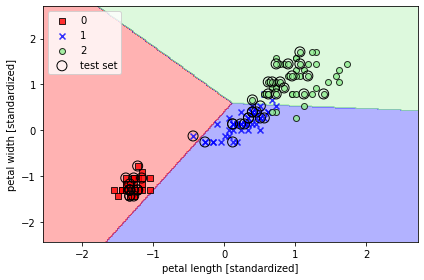

In [11]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


The three flower classes cannot be perfectly separated by a linear decision boundary.

# Logistic regression 
Let's simply plot the sigmoid function for some values in the range –7 to 7 

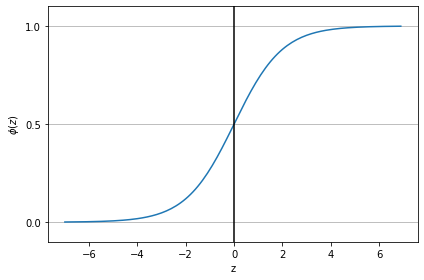

In [12]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()

<ipython-input-10-5347af230dfc>:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


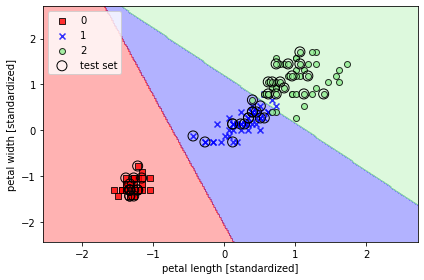

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

After fitting the model on the training data, we plotted the decision regions, training examples, and test examples, as shown in the previous plot.

The probability that training examples belong to a certain class can be computed
using the `predict_proba` method. For example, we can predict the probabilities
of the first three examples in the test dataset as follows:

In [14]:
lr.predict_proba(X_test_std[:3, :])



array([[3.81527885e-09, 1.44792866e-01, 8.55207131e-01],
       [8.34020679e-01, 1.65979321e-01, 3.25737138e-13],
       [8.48831425e-01, 1.51168575e-01, 2.62277619e-14]])

The first row corresponds to the class-membership probabilities of the first flower, the second row corresponds to the class-membership probabilities of the second flower, and so forth. Notice that the columns all sum up to one, as expected.
You can confirm this by executing:

In [ ]:
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)

The highest value in the first row is approximately 0.85, which means that the
first example belongs to class three (*Iris-virginica*) with a predicted probability of 85 percent. So, as you may have already noticed, we can get the predicted class labels by identifying the largest column in each row, for example, scikit-learn is to call the `predict` method:

In [16]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

The returned class indices are shown here (they correspond to *Iris-virginica*,
*Iris-setosa*, and *Iris-setosa*).
Lastly, a word of caution if you want to predict the class label of a single flower example: scikit-learn expects a two-dimensional array as data input; thus, we have to convert a single row slice into such a format first. One way to convert a single row entry into a two-dimensional data array is to use NumPy's `reshape` method to add a new dimension, as demonstrated here:

In [17]:
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])